In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import astropy.table

In [112]:
def calculate_depth(band,make_plot=False, exptime=6900., X=1.2, mode='Ivezic'):
    #Values from Ivezic 2014
    if mode=='Ivezic':
        msky = {'u':22.9, 'g':22.3, 'r':21.2, 'i':20.5, 'z':19.6, 'y':18.6}
        cm = {'u':22.92 , 'g':24.29, 'r':24.33, 'i':24.20, 'z':24.07, 'y':23.69} 
        psf = {'u':0.77 , 'g':0.73, 'r':0.70, 'i':0.67, 'z':0.65, 'y':0.63} 
        inst_noise_corr = {'u':0.67 , 'g':0.21, 'r':0.11, 'i':0.08, 'z':0.05, 'y':0.04}
        km = {'u':0.451,'g':0.163,'r':0.087,'i':0.065,'z':0.043,'y':0.138}
    ####################
    #Values from https://github.com/lsst-pst/syseng_throughputs/blob/master/plots/table2
    if mode=='Sys_eng':
        psf = {'u':0.92 , 'g':0.87, 'r':0.83, 'i':0.80, 'z':0.78, 'y':0.76} 
        cm = {'u':22.74, 'g':24.38, 'r':24.43, 'i':24.30 , 'z':24.15, 'y':23.70}
        msky = {'u':22.95, 'g':22.24, 'r':21.20, 'i':20.47, 'z':19.60, 'y':18.63}
        inst_noise_corr = {'u':0.75 , 'g':0.19, 'r':0.10, 'i':0.07, 'z':0.05, 'y':0.04}
        km = {'u':0.5041,'g':0.2097,'r':0.1263,'i':0.0962,'z':0.0685,'y':0.1760}
    
    exptime_corr = {'u':0.,'g':0.,'r':0,'i':0,'z':0,'y':0} #This is going to be the electronic noise correction placeholder
    exptime_corr[band] = inst_noise_corr[band]-1.25*np.log10(1+(10**(0.8*inst_noise_corr[band])-1)/(exptime/30.))
    fid_depth = cm[band]+0.5*(msky[band]-21.)+2.5*np.log10(0.7/psf[band]*X**0.6)-km[band]*(X-1)+1.25*np.log10(exptime/30.)+exptime_corr[band]
    colors = {'u':'violet','g':'blue','r':'green','i':'yellow','z':'orange','y':'red'}
    source_table = astropy.table.Table.read('/Users/javiers/WeakLensingDeblending/LSST_%s_512_512.fits' %(band))
    if make_plot:
        plt.hist(source_table['ab_mag'][source_table['snr_iso']>5.],alpha=0.5,label='%s-band' %band, color=colors[band])
        plt.plot(fid_depth*np.ones_like(np.arange(0,250,50)),np.arange(0,250,50),color=colors[band])
        plt.xlabel('mag$_{AB}$')
        plt.ylabel('Counts')
        plt.legend(loc='best')
        plt.xlim(17,30)
    maxdepth = np.nanmax(source_table['ab_mag'][source_table['snr_iso']>5.])
    mediandepth = np.nanmedian(source_table['ab_mag'][source_table['snr_iso']>5.])
    meandepth = np.nanmean(source_table['ab_mag'][source_table['snr_iso']>5.])
    mad = np.nanmedian(np.fabs(source_table['ab_mag'][source_table['snr_iso']>5.]-mediandepth))
    print 'Band: ',band, 'median 5-sigma depth = ', mediandepth, '+-', mad, ' Fiducial value = ', fid_depth
    return maxdepth, mediandepth

Band:  u median 5-sigma depth =  26.0962 +- 0.593105  Fiducial value =  23.7665182871
Band:  g median 5-sigma depth =  26.5799 +- 0.654543  Fiducial value =  24.8944379497
Band:  r median 5-sigma depth =  26.0151 +- 0.680775  Fiducial value =  24.43
Band:  i median 5-sigma depth =  25.4677 +- 0.674185  Fiducial value =  23.9975580933
Band:  z median 5-sigma depth =  24.9068 +- 0.630817  Fiducial value =  23.4504617084
Band:  y median 5-sigma depth =  24.0589 +- 0.649626  Fiducial value =  22.6043937264


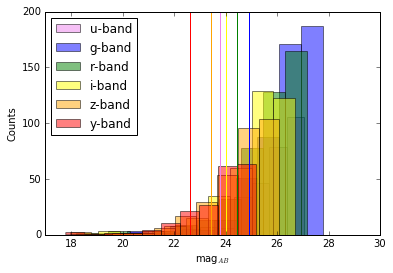

In [116]:
for band in ['u','g','r','i','z','y']:
    calculate_depth(band, make_plot=True,mode='Ivezic', exptime=30, X=1.0)

Band:  u median 5-sigma depth =  26.0962 +- 0.593105  Fiducial value =  23.4182755317
Band:  g median 5-sigma depth =  26.5799 +- 0.654543  Fiducial value =  24.7639469685
Band:  r median 5-sigma depth =  26.0151 +- 0.680775  Fiducial value =  24.3450498691
Band:  i median 5-sigma depth =  25.4677 +- 0.674185  Fiducial value =  23.8900201326
Band:  z median 5-sigma depth =  24.9068 +- 0.630817  Fiducial value =  23.3325085933
Band:  y median 5-sigma depth =  24.0589 +- 0.649626  Fiducial value =  22.4257111193


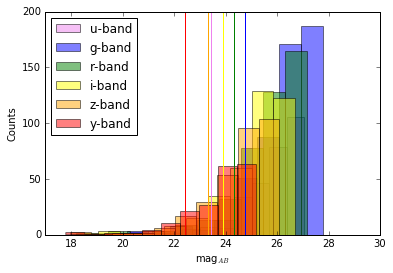

In [115]:
for band in ['u','g','r','i','z','y']:
    calculate_depth(band, make_plot=True,mode='Sys_eng', exptime=30, X=1.0)